In [1]:
import setup
from circuits import * 
from number import *
import math
import pandas as pd
import sympy as sp
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn import svm
import numpy as np
from tqdm.notebook import tqdm

In [2]:
def prime_factors(n):
    i = 2
    factors = []
    while i * i <= n:
        if n % i:
            i += 1
        else:
            n //= i
            factors.append(i)
    if n > 1:
        factors.append(n)
    return factors

def get_factors(n):
    factors = []
    phi_n = n#sp.totient(n)
    for i in range(1, phi_n+1):
        if(phi_n%i==0):
            factors.append(i)
    return factors


def parity_2(x):
    if   (x==0 or x==-1):
        return 0
    x = int(np.abs(x))
    if ((x) % 2 == 1):
        return -1
    else:
        return 1

def order_slow(x,N):
    assert(N+1>x)
    if(math.gcd(x,N)!=1):
        return -1
    for i in range(1,N+1):
        a = x
        for j in range(1,i):
            a = x*a % N
        if(a==1):
            return i

        

def order_fast(x,N):
    assert(N+1>x)
    if(math.gcd(x,N)!=1):
        return -1
    for i in range(1,N+1):
        if((x**i % N) == 1):
            return i

def coprime_density(x):
    return sp.totient(x)/x

In [4]:
ords = pd.read_csv("./data_OF/ords100.csv")

In [5]:
ords.index

RangeIndex(start=0, stop=300, step=1)

In [6]:
ords = ords.set_index("Unnamed: 0")

# Order statistics

In [7]:
def order_stats_formula(x):
    ps = prime_factors(sp.totient(x))
    a = ps.count(2)
    ps_odd_only = [p for p in ps if p!=2]
    m = 1
    for i in ps_odd_only:
        m*=i
    counts = np.array([ m,(x-m*(2**a)), m*(2**a - 1)])
    counts = counts/sum(counts)
    return dict(zip([-1,0,1], counts))

In [8]:
def order_stats_brute(x):
    if(isinstance(x,int) or isinstance(x,np.int64)):
        x = orders_single_number(x)
    labels, counts = np.unique([parity_2(i) for i in x], return_counts=True)
    counts = counts/sum(counts)
    return dict(zip(labels, counts))


In [9]:
def orders_single_number(x, method=order_fast):
    N = x
    orders_single_number = []
    for i in tqdm(range(1,N+1)):
        #print(i)
        orders_single_number.append(method(i,N))
    x = orders_single_number 
    return np.array(x)


In [59]:
# Fermat calculations
F2 = 17
F3 = 257 
F4 = 65537

In [60]:
N_fermat = F3*F4

In [61]:
fermat_coprimes = coprimes(F3*F4)

In [62]:
orders_fermat_list = np.zeros(N_fermat)

In [63]:
for i in fermat_coprimes:
    if(i==1):
        orders_fermat_list[i-1] = -1
    else:
        orders_fermat_list[i-1] = 1
        

In [15]:
# Semiprime 
N = ords.index[1]

In [11]:
np.array(list(order_stats_brute(N).values()))

  0%|          | 0/247 [00:00<?, ?it/s]

array([0.10526316, 0.12550607, 0.76923077])

In [12]:
np.array(list(order_stats_formula(N).values()))

array([0.10931174, 0.12550607, 0.76518219])

In [230]:
# Verifying order stats formula with brute force calculations
for i in range(20):
    N = ords.index[i]
    a,b = np.array(list(order_stats_brute(N).values())), np.array(list(order_stats_formula(N).values()))
    print(np.linalg.norm(a-b))
    

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [318]:
N = ords.index[40]
orders_single_number_list = orders_single_number(N)

In [319]:
order_stats_iterations = []

for k in range(10,N, 100):
    orders_single_number_sample = np.random.choice(orders_single_number_list, (k), replace=False)
    order_stats_iterations.append(order_stats_brute(orders_single_number_sample))
    print(order_stats_iterations[-1])

{-1: 0.2, 1: 0.8}
{-1: 0.13636363636363635, 0: 0.05454545454545454, 1: 0.8090909090909091}
{-1: 0.14285714285714285, 0: 0.06190476190476191, 1: 0.7952380952380952}
{-1: 0.14516129032258066, 0: 0.04838709677419355, 1: 0.8064516129032258}
{-1: 0.12439024390243902, 0: 0.07560975609756097, 1: 0.8}
{-1: 0.13725490196078433, 0: 0.054901960784313725, 1: 0.807843137254902}
{-1: 0.12786885245901639, 0: 0.05245901639344262, 1: 0.819672131147541}
{-1: 0.12535211267605634, 0: 0.057746478873239436, 1: 0.8169014084507042}
{-1: 0.11728395061728394, 0: 0.05308641975308642, 1: 0.8296296296296296}
{-1: 0.11758241758241758, 0: 0.06593406593406594, 1: 0.8164835164835165}
{-1: 0.11584158415841585, 0: 0.05841584158415842, 1: 0.8257425742574257}
{-1: 0.11801801801801802, 0: 0.055855855855855854, 1: 0.8261261261261261}
{-1: 0.1206611570247934, 0: 0.05371900826446281, 1: 0.8256198347107438}
{-1: 0.11450381679389313, 0: 0.05419847328244275, 1: 0.8312977099236641}


In [320]:
k

1310

In [321]:
# slight error only due to k < N still on final iteratoin
order_stats_formula(N)

{-1: 0.11812179016874541, 0: 0.055025678650036686, 1: 0.8268525311812179}

In [322]:
num_evens_iterations = [o[1] for o in order_stats_iterations]

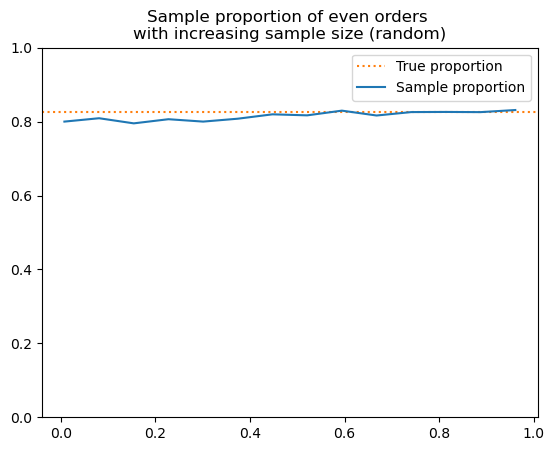

In [324]:
plt.ylim(0,1)

plt.axhline(y=order_stats_formula(N)[1], color="C1", linestyle=":", label="True proportion")
plt.plot(np.asarray(range(10,N,100))/N, num_evens_iterations, label= "Sample proportion")
plt.legend()
plt.title("Sample proportion of even orders \nwith increasing sample size (random)")
plt.show()

In [331]:
order_stats_iterations = []

for k in range(10,N, 100):
    orders_single_number_sample = orders_single_number_list[:k]
    order_stats_iterations.append(order_stats_brute(orders_single_number_sample))
    print(order_stats_iterations[-1])
    
num_evens_iterations = [o[1] for o in order_stats_iterations]

{-1: 0.2, 1: 0.8}
{-1: 0.14545454545454545, 0: 0.045454545454545456, 1: 0.8090909090909091}
{-1: 0.12857142857142856, 0: 0.05238095238095238, 1: 0.819047619047619}
{-1: 0.12258064516129032, 0: 0.05161290322580645, 1: 0.8258064516129032}
{-1: 0.11707317073170732, 0: 0.05365853658536585, 1: 0.8292682926829268}
{-1: 0.12352941176470589, 0: 0.052941176470588235, 1: 0.8235294117647058}
{-1: 0.12295081967213115, 0: 0.054098360655737705, 1: 0.8229508196721311}
{-1: 0.12112676056338029, 0: 0.054929577464788736, 1: 0.823943661971831}
{-1: 0.1259259259259259, 0: 0.05432098765432099, 1: 0.8197530864197531}
{-1: 0.12197802197802197, 0: 0.054945054945054944, 1: 0.823076923076923}
{-1: 0.1198019801980198, 0: 0.054455445544554455, 1: 0.8257425742574257}
{-1: 0.11891891891891893, 0: 0.054954954954954956, 1: 0.8261261261261261}
{-1: 0.11652892561983472, 0: 0.05454545454545454, 1: 0.8289256198347107}
{-1: 0.1183206106870229, 0: 0.0549618320610687, 1: 0.8267175572519084}


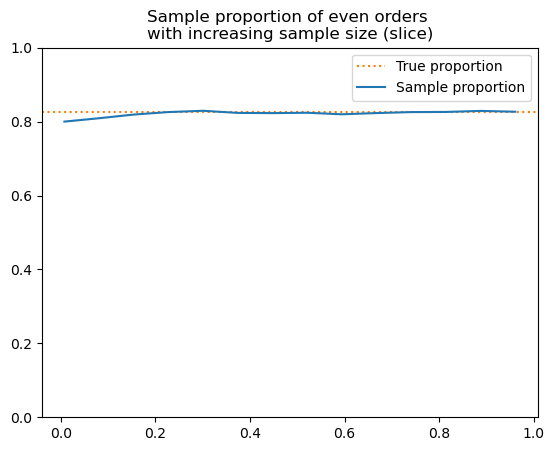

In [333]:
plt.ylim(0,1)

plt.axhline(y=order_stats_formula(N)[1], color="C1", linestyle=":", label="True proportion")
plt.plot(np.asarray(range(10,N,100))/N, num_evens_iterations, label= "Sample proportion")
plt.legend()
plt.title("Sample proportion of even orders \nwith increasing sample size (slice)")
plt.show()

## Statistical Difference Calculations

In [46]:
N = 2021
orders_single_number_list = orders_single_number(N)

In [47]:
orders_single_number_list_processed = np.vectorize(parity_2)(orders_single_number_list)

In [48]:
orders_single_number_list_processed.shape

(2021,)

In [49]:
orders_fermat_list.shape

(16843009,)

In [50]:
np.unique(orders_single_number_list_processed[:N] != orders_fermat_list[:N], return_counts=True)

(array([False,  True]), array([1444,  577], dtype=int64))

In [472]:
np.unique(orders_single_number_list_processed[:N] != orders_fermat_list[:N], return_counts=True)

(array([False,  True]), array([1444,  577], dtype=int64))

In [51]:
np.sum(np.abs(orders_single_number_list_processed[:N] != orders_fermat_list[:N]))/N

0.2855022266204849

In [473]:
np.sum(np.abs(orders_single_number_list_processed[:N] != orders_fermat_list[:N]))/N

0.2855022266204849

In [474]:
0.25 + 0.004

0.254

In [ ]:
for i in ords.index:
    if(prime_factors(sp.totient(i)).count(2)==2):
        N = i
        orders_single_number_list = orders_single_number(N)

        orders_single_number_list_processed = np.vectorize(parity_2)(orders_single_number_list)

        np.unique(orders_single_number_list_processed[:N] != orders_fermat_list[:N], return_counts=True)

        print(np.sum(np.abs(orders_single_number_list_processed[:N] != orders_fermat_list[:N]))/N)


In [483]:
dict(zip(b,a))

{437: 0.32036613272311215,
 589: 0.31239388794567063,
 713: 0.30434782608695654,
 817: 0.30599755201958384,
 989: 0.2992922143579373,
 1333: 0.29257314328582146,
 893: 0.3068309070548712,
 1081: 0.30064754856614245,
 1457: 0.2916952642415923,
 2021: 0.2855022266204849,
 1121: 0.3033006244424621,
 1357: 0.2955047899778924,
 1829: 0.2875888463641334,
 2537: 0.28182893180922347,
 2773: 0.281283808150018,
 1273: 0.30243519245875883,
 1541: 0.2946138870863076,
 2077: 0.2874337987481945,
 2881: 0.2818465810482471,
 3149: 0.28008891711654493,
 3953: 0.2762458891980774,
 1349: 0.30244625648628615,
 1633: 0.29577464788732394,
 2201: 0.28714220808723306,
 3053: 0.2807075008188667,
 3337: 0.27929277794426133}

In [576]:
ords.index.max()

12317

In [52]:
for i in ords.index:
    if(prime_factors(sp.totient(i)).count(2)>=7):
        a = prime_factors(sp.totient(i)).count(2)
        print(i, a)
        print(coprime_density(i))
        N = i
        orders_single_number_list = orders_single_number(N)

        orders_single_number_list_processed = np.vectorize(parity_2)(orders_single_number_list)

        np.unique(orders_single_number_list_processed[:N] != orders_fermat_list[:N], return_counts=True)

        print(np.sum(np.abs(orders_single_number_list_processed[:N] != orders_fermat_list[:N]))/N <= (2 - np.abs(coprime_density(N) + coprime_density(N_fermat))) + 1/(2**a) + 1/N)

697 7


NameError: name 'coprime_density' is not defined

In [55]:
N = 697

In [57]:
a1 = prime_factors(sp.totient(N)).count(2)
a2 = prime_factors(sp.totient(N_fermat)).count(2)

In [61]:
print(coprime_density(N) + coprime_density(N_fermat) - coprime_density(N)*coprime_density(N_fermat)*(2 - 1/(2**a1) - 1/(2**a2) + 1/(2**(a1+a2-1))))

0.09219203697301648

In [70]:
for i in ords.index:
    if(prime_factors(sp.totient(i)).count(2)==9):
        a2 = prime_factors(sp.totient(N_fermat)).count(2)
        a = prime_factors(sp.totient(i)).count(2)
        print(i, a)
        print(coprime_density(i))
        N = i
        orders_single_number_list = orders_single_number(N)

        orders_single_number_list_processed = np.vectorize(parity_2)(orders_single_number_list)

        np.unique(orders_single_number_list_processed[:N] != orders_fermat_list[:N], return_counts=True)
        
        #print(1/(2**a) + 1/(2**a2) - 1/(2**(a1+a2-1)))
        print(coprime_density(N) + coprime_density(N_fermat) - coprime_density(N)*coprime_density(N_fermat)*(2 - 1/(2**a) - 1/(2**a2) + 1/(2**(a+a2-1))))
        print(np.sum(np.abs(orders_single_number_list_processed[:N] != orders_fermat_list[:N]))/N) #<= (2 - np.abs(coprime_density(N) + coprime_density(N_fermat))) + 1/(2**a) + 1/N)

1649 9
0.9314736203759855
0.07370950000578991
0.07337780473013948
10961 9
0.9809323966791351
0.02473334512652614
0.024632788979107745


In [652]:
N = 1649

In [653]:
(2 - np.abs(coprime_density(N) + coprime_density(N_fermat))) + 1/(2**9) + 1/N

0.074992182530359

In [641]:
for i in range(1000):
    for j in range(i):
        if(prime_factors(sp.totient(primes[:200][i]*primes[:200][j])).count(2)==9):
            print(primes[:200][i]*primes[:200][j])

1649
10961
7913
14089
17177
26441
44969
23377
771
1799
2827
4883
5911
7967
11051
12079
15163
17219
18247
20303
21331
26471
27499
32639
33667
35723
38807
41891
42919
46003
49087
51143
54227
57311
58339
61423
64507
67591
69647
54233
72731
78899
79927
60409
85067
32689
89179
6001
39889
85073
118961
92263
94319
97403
98431
38897
141553
78937
107683
110767
42001
152849
112823
113851
18409
32777
39961
61513
104617
126169
140537
183641
88201
205193
118991
120019
123103
125159
126187
128243
129271
100553
233929
134411
140579
144691
109817
255481
146747
23657
42121
51353
79049
134441
162137
180601
235993
263689
300617
328313
150859
57521
209329
153943
115993
269849
346777
155999
119081
277033
356009
159083
162167
3205
8333
18589
23717
33973
39101
64741
69869
95509
100637
110893
116021
126277
146789
172429
177557
187813
203197
223709
239093
249349
254477
269861
295501
326269
346781
357037
392933
165251
166279
418573
169363
423701
11441
76049
162193
226801
269873
291409
399089
433957
175531
17758

KeyboardInterrupt: 

In [639]:
coprime_density(357037)

0.9966474062912247

In [637]:
len(primes)

303

In [562]:
1/(2**8)

0.00390625

In [539]:
np.unique(orders_fermat_list[:N], return_counts=True)

(array([-1.,  0.,  1.]), array([   1,   13, 3575], dtype=int64))

In [540]:
1- 13/N

0.9963778211200892

In [536]:
coprime_density(N_fermat)

0.9960937502319211

In [516]:
order_stats_formula(N)

{-1: 0.0037716872014080965, 0: 0.034448076439527284, 1: 0.9617802363590646}

In [571]:
np.unique(orders_single_number_list_processed[:N] != orders_fermat_list[:N], return_counts=True)

(array([False,  True]), array([10691,   270], dtype=int64))

In [621]:
N = 3811+166

In [548]:
coprime_density(10573)

0.9806109902582049

In [559]:
(166-133)/3977

0.008297711843097813

In [570]:
count

209

In [569]:

count = 0 
for i in range(N):
    a = orders_single_number_list_processed[i]
    b = orders_fermat_list[:N][i]
    if(a!=b):
        if(a==0 and b==1.0):
            count+=1
        print(a,b)

0 1.0
0 1.0
0 1.0
0 1.0
1 0.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
1 0.0
0 1.0
0 1.0
0 1.0
0 1.0
1 0.0
0 1.0
0 1.0
0 1.0
0 1.0
-1 1.0
0 1.0
0 1.0
1 0.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
1 0.0
0 1.0
0 1.0
0 1.0
0 1.0
1 0.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
1 0.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
1 0.0
0 1.0
0 1.0
0 1.0
0 1.0
1 0.0
0 1.0
0 1.0
-1 1.0
0 1.0
0 1.0
0 1.0
1 0.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
1 0.0
-1 1.0
0 1.0
0 1.0
0 1.0
0 1.0
1 0.0
0 1.0
0 1.0
-1 1.0
0 1.0
0 1.0
0 1.0
1 0.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
1 0.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
1 0.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
1 0.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
1 0.0
-1 1.0
0 1.0
0 1.0
0 1.0
0 1.0
1 0.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
1 0.0
0 1.0
0 1.0
0 1.0
0 1.0
1 0.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
1 0.0
0 1.0
0 1.0
0 1.0
-1 1.0
0 1.0
0 1.0
0 1.0
1 0.0
0 1.0
0 1.0
0 1.0
0 1.0
1 0.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
1 0.0
0 1.0
0 1.0
-1 1.0
0 1.0
0 1.0
0 1.0
1 0.0
-1 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
1 0.0
0 1.0
0 1.0
0 1.0
0 1.0
0 

# Toss Statistics

In [9]:
def bit_strings(n,k):
    assert(n>=k)
    if k==0:
        return ['0'*n]
    elif n==k:
        return ['1'*n]
    else: 
        return [s + '0' for s in bit_strings(n-1,k)] + [s + '1' for s in bit_strings(n-1,k-1)]
    

In [10]:
from itertools import product
def cart_product(l1, l2):
    return list(product(l1, l2))

In [16]:
def analytic_collision(m,n,k):
    return m + n - 2*m*n/k

In [11]:
def collisions(l):
    return [sum([m!=n for m,n in zip(i,j)]) for i,j in l]

In [27]:
k = 10
m = 1
n = 7

In [28]:
n3131 = cart_product(bit_strings(k,m),bit_strings(k,n))

In [29]:
np.mean(collisions(n3131))

6.6

In [30]:
analytic_collision(m,n,k)

6.6

In [22]:
np.unique(collisions(n3131), return_counts=True)

(array([0, 2]), array([10, 90], dtype=int64))

In [2]:
import sympy as sp

## Variance calculations

In [3]:
import sympy as sp

In [4]:
B1, B2, R1, R2, G1, G2 = sp.symbols("B_1 B_2 R_1 R_2 G_1 G_2")

In [5]:
k, N, N_bar, S, S_bar = sp.symbols("k N \overline{N} S \overline{S}")

In [6]:
# R1 = N - B1 - G1
# R2 = N - B2 - G2
# N_bar = N-1
# E_BG = sp.expand(B2*G2*(R1*N_bar + B1*G1) + B1*G1*(R2*N_bar + B2*G2) + G1*B2*(N_bar - B1)*(N_bar - G2) + G2*B1*(N_bar - B2)*(N_bar - G1))
# E_XY.subs({N_bar : N - 1}).expand() - E_XY_simplify.subs({N_bar : N - 1}).expand()

In [7]:
E_BG_simplify = sp.Mul(((k*(k-1))/(N*S*N_bar*S_bar)),(4*G1*G2*B1*B2 - sp.Rational(1/2)*N_bar*((G1 + G2)*(4*B1*B2 - N*(B1 + B2)) + 2*G1*B2 + 2*G2*B1 + (B1 + B2)*(4*G1*G2 - N*(G1 + G2)))), evaluate=False) + sp.Mul((k/(N*S)),(B1*G2 + B2*G1), evaluate=False)

In [8]:
E_BG_simplify

(k/(N*S))*(B_1*G_2 + B_2*G_1) + (k*(k - 1)/(N*S*\overline{N}*\overline{S}))*(4*B_1*B_2*G_1*G_2 - \overline{N}*(2*B_1*G_2 + 2*B_2*G_1 + (B_1 + B_2)*(4*G_1*G_2 - N*(G_1 + G_2)) + (G_1 + G_2)*(4*B_1*B_2 - N*(B_1 + B_2)))/2)

In [9]:
E_BR_simplify = E_BG_simplify.subs(dict(zip([G1, G2], [R1, R2]))).copy()

In [10]:
E_RG_simplify = E_BG_simplify.subs(dict(zip([B1, B2], [R1, R2]))).copy()

In [11]:
E_RG_simplify

k*(G_1*R_2 + G_2*R_1)/(N*S) + k*(k - 1)*(4*G_1*G_2*R_1*R_2 - \overline{N}*(2*G_1*R_2 + 2*G_2*R_1 + (G_1 + G_2)*(-N*(R_1 + R_2) + 4*R_1*R_2) + (R_1 + R_2)*(4*G_1*G_2 - N*(G_1 + G_2)))/2)/(N*S*\overline{N}*\overline{S})

In [12]:
E_B = k*(B1/N + B2/S - 2*B1*B2/(N*S))

In [13]:
E_B

k*(-2*B_1*B_2/(N*S) + B_1/N + B_2/S)

In [14]:
E_R = E_B.subs(dict(zip([B1, B2], [R1, R2]))).copy()

In [15]:
E_G = E_B.subs(dict(zip([B1, B2], [G1, G2]))).copy()

In [16]:
E_GG = G1*(S-G2)*(G1-1)*(S_bar - G2) + G2*(N-G1)*(G2-1)*(N_bar - G1) + 2*G1*G2*(S-G2)*(N-G1)

In [17]:
E_GG.expand()

4*G_1**2*G_2**2 - 3*G_1**2*G_2*S - G_1**2*G_2*\overline{S} - G_1**2*G_2 + G_1**2*S*\overline{S} - 3*G_1*G_2**2*N - G_1*G_2**2*\overline{N} - G_1*G_2**2 + 2*G_1*G_2*N*S + G_1*G_2*N + G_1*G_2*S + G_1*G_2*\overline{N} + G_1*G_2*\overline{S} - G_1*S*\overline{S} + G_2**2*N*\overline{N} - G_2*N*\overline{N}

In [18]:
E_GG_simplify = sp.Mul(((k*(k-1))/(N*S*N_bar*S_bar)),G1*(S-G2)*(S_bar*(G1 -1) + G2*(N+1) - 2*G1*G2) +  G2*(N-G1)*(N_bar*(G2 -1) + G1*(S+1) - 2*G1*G2), evaluate=False) + E_G

In [19]:
E_GG_simplify

k*(-2*G_1*G_2/(N*S) + G_1/N + G_2/S) + (k*(k - 1)/(N*S*\overline{N}*\overline{S}))*(G_1*(-G_2 + S)*(-2*G_1*G_2 + G_2*(N + 1) + \overline{S}*(G_1 - 1)) + G_2*(-G_1 + N)*(-2*G_1*G_2 + G_1*(S + 1) + \overline{N}*(G_2 - 1)))

In [21]:
E_GG_simplify.subs({S:N, S_bar: N_bar})

k*(-2*G_1*G_2/N**2 + G_1/N + G_2/N) + k*(k - 1)*(G_1*(-G_2 + N)*(-2*G_1*G_2 + G_2*(N + 1) + \overline{N}*(G_1 - 1)) + G_2*(-G_1 + N)*(-2*G_1*G_2 + G_1*(N + 1) + \overline{N}*(G_2 - 1)))/(N**2*\overline{N}**2)

In [22]:
print(sp.latex(E_GG_simplify.subs({S:N, S_bar: N_bar})))

k \left(- \frac{2 G_{1} G_{2}}{N^{2}} + \frac{G_{1}}{N} + \frac{G_{2}}{N}\right) + \frac{k \left(k - 1\right) \left(G_{1} \left(- G_{2} + N\right) \left(- 2 G_{1} G_{2} + G_{2} \left(N + 1\right) + \overline{N} \left(G_{1} - 1\right)\right) + G_{2} \left(- G_{1} + N\right) \left(- 2 G_{1} G_{2} + G_{1} \left(N + 1\right) + \overline{N} \left(G_{2} - 1\right)\right)\right)}{N^{2} \overline{N}^{2}}


In [23]:
M, M_bar, R1_prime, R2_prime = sp.symbols("M \overline{M} R'_1 R'_2")

In [25]:
print(sp.latex(E_GG_simplify.subs({S:M, S_bar: M_bar, N: M, N_bar: M_bar, G1: R1_prime, G2: R2_prime})))

k \left(\frac{R'_{1}}{M} + \frac{R'_{2}}{M} - \frac{2 R'_{1} R'_{2}}{M^{2}}\right) + \frac{k \left(k - 1\right) \left(R'_{1} \left(M - R'_{2}\right) \left(- 2 R'_{1} R'_{2} + R'_{2} \left(M + 1\right) + \overline{M} \left(R'_{1} - 1\right)\right) + R'_{2} \left(M - R'_{1}\right) \left(- 2 R'_{1} R'_{2} + R'_{1} \left(M + 1\right) + \overline{M} \left(R'_{2} - 1\right)\right)\right)}{M^{2} \overline{M}^{2}}


In [675]:
E_BB_simplify = E_GG_simplify.subs(dict(zip([G1, G2], [B1, B2]))).copy()

In [676]:
E_RR_simplify = E_GG_simplify.subs(dict(zip([G1, G2], [R1, R2]))).copy()

In [679]:
E_G

k*(-2*G_1*G_2/(N*S) + G_1/N + G_2/S)

In [680]:
E_B

k*(-2*B_1*B_2/(N*S) + B_1/N + B_2/S)

In [681]:
E_G

k*(-2*G_1*G_2/(N*S) + G_1/N + G_2/S)

In [682]:
E_RGB = (E_R + E_G + E_B)/(2*k)

In [684]:
V_G = E_GG_simplify - (E_G)**2

In [685]:
V_B = V_G.subs(dict(zip([G1, G2], [B1, B2]))).copy()

In [686]:
V_R = V_G.subs(dict(zip([G1, G2], [R1, R2]))).copy()

In [687]:
V_BG = E_BG_simplify - E_B*E_G

In [688]:
V_BR = V_BG.subs(dict(zip([G1, G2], [R1, R2]))).copy()

In [689]:
V_RG = V_BG.subs(dict(zip([B1, B2], [R1, R2]))).copy()

In [690]:
V_RGB = V_G + V_B + V_R + 2*V_BG + 2*V_BR + 2*V_RG

In [691]:
V_RGB = V_RGB/(4*k**2)

In [693]:
n = 17065157#11021 #small_evenness[-1]
s = N_fermat
m = max([n,s])
counts = {(k,i): int(m*v) for i in [n,s] for k,v in order_stats_formula(i).items()}

In [694]:
marbles = dict(zip([G1, R1, B1, G2, R2, B2], list(counts.values())))

In [695]:
values = {**marbles, **{N: m, N_bar : m - 1, S: m, S_bar : m-1, k: 100}}

In [518]:
math.sqrt(V_RGB.subs(values).evalf())

0.010962091107953055

In [697]:
E_RGB.subs(values).evalf()

0.0121648109150719

In [80]:
E_RGB.subs(values).evalf()

0.0121648109150719

In [699]:
E_RGB

(k*(R_2/S - 2*R_1*R_2/(N*S) + R_1/N) + k*(-2*B_1*B_2/(N*S) + B_1/N + B_2/S) + k*(-2*G_1*G_2/(N*S) + G_1/N + G_2/S))/(2*k)

In [698]:
V_RGB

(-k**2*(R_2/S - 2*R_1*R_2/(N*S) + R_1/N)**2 - 2*k**2*(R_2/S - 2*R_1*R_2/(N*S) + R_1/N)*(-2*B_1*B_2/(N*S) + B_1/N + B_2/S) - 2*k**2*(R_2/S - 2*R_1*R_2/(N*S) + R_1/N)*(-2*G_1*G_2/(N*S) + G_1/N + G_2/S) - k**2*(-2*B_1*B_2/(N*S) + B_1/N + B_2/S)**2 - 2*k**2*(-2*B_1*B_2/(N*S) + B_1/N + B_2/S)*(-2*G_1*G_2/(N*S) + G_1/N + G_2/S) - k**2*(-2*G_1*G_2/(N*S) + G_1/N + G_2/S)**2 + k*(R_2/S - 2*R_1*R_2/(N*S) + R_1/N) + k*(-2*B_1*B_2/(N*S) + B_1/N + B_2/S) + k*(-2*G_1*G_2/(N*S) + G_1/N + G_2/S) + 2*(k/(N*S))*(B_1*G_2 + B_2*G_1) + (k*(k - 1)/(N*S*\overline{N}*\overline{S}))*(G_1*(-G_2 + S)*(-2*G_1*G_2 + G_2*(N + 1) + \overline{S}*(G_1 - 1)) + G_2*(-G_1 + N)*(-2*G_1*G_2 + G_1*(S + 1) + \overline{N}*(G_2 - 1))) + 2*(k*(k - 1)/(N*S*\overline{N}*\overline{S}))*(4*B_1*B_2*G_1*G_2 - \overline{N}*(2*B_1*G_2 + 2*B_2*G_1 + (B_1 + B_2)*(4*G_1*G_2 - N*(G_1 + G_2)) + (G_1 + G_2)*(4*B_1*B_2 - N*(B_1 + B_2)))/2) + 2*k*(B_1*R_2 + B_2*R_1)/(N*S) + 2*k*(G_1*R_2 + G_2*R_1)/(N*S) + k*(k - 1)*(B_1*(-B_2 + S)*(-2*B_1*B_2 

In [700]:
a2 = prime_factors(sp.totient(s)).count(2)
a = prime_factors(sp.totient(n)).count(2)
print(coprime_density(n) + coprime_density(s) - coprime_density(n)*coprime_density(s)*(2 - 1/(2**a) - 1/(2**a2) + 1/(2**(a+a2-1))))

0.012164827330033212


In [86]:
def get_stats(n, k1):
    s = N_fermat
    m = max([n,s])
    counts = {(k,i): int(m*v) for i in [n,s] for k,v in order_stats_formula(i).items()}
    
    marbles = dict(zip([G1, R1, B1, G2, R2, B2], list(counts.values())))
    
    values = {**marbles, **{N: m, N_bar : m - 1, k: k1}}
    
    return {"Exp": E_RGB.subs(values).evalf(), "Var": V_RGB.subs(values).evalf()}



In [181]:
small_evenness = []
large_evenness = []
for i in ords.index:
    if(prime_factors(sp.totient(i)).count(2)==2):
        small_evenness.append(i)
    elif(prime_factors(sp.totient(i)).count(2)==7):
        large_evenness.append(i)
    

In [412]:
small_exps = []
small_vars = []
for i in small_evenness:
    e,v = list(get_stats(i,100).values())
    small_exps.append(e)
    small_vars.append(v)

In [414]:
large_exps = []
large_vars = []
for i in large_evenness:
    e,v = list(get_stats(i,100).values())
    large_exps.append(e)
    large_vars.append(v)

In [ ]:
import collections
od = collections.OrderedDict(sorted(d.items()))

In [430]:
prime_factors(sp.totient(s)).count(2)

24

In [431]:
def exp_formula(a):
    a2 = prime_factors(sp.totient(s)).count(2)
    return 1/(2**a) + 1/(2**a2) - 1/(2**(a+a2-1))

In [448]:
exp_formula = np.vectorize(exp_formula)

In [454]:
coprime_density(10573)

0.9806109902582049

In [421]:
d_small = dict(zip(small_evenness, small_exps))
d_large = dict(zip(large_evenness, large_exps))


In [422]:
import collections
d_small = dict(collections.OrderedDict(sorted(d_small.items())                ))
d_large = dict(collections.OrderedDict(sorted(d_large.items())))

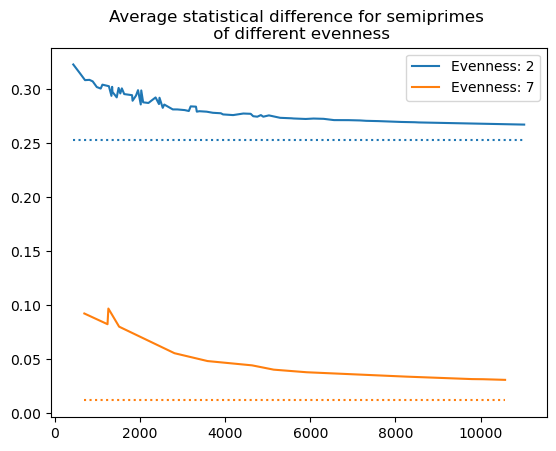

In [449]:
plt.plot(d_small.keys(), d_small.values(), label="Evenness: 2")
plt.plot(d_small.keys(),exp_formula(list(d_small.keys())), color="C0", linestyle=":")

plt.plot(d_large.keys(), d_large.values(), label="Evenness: 7")
plt.plot(d_large.keys(),exp_formula(list(d_large.keys())), color="C1", linestyle=":")

plt.title("Average statistical difference for semiprimes \n of different evenness")

# plt.axhline(y=exp_formula(2), color="C0", linestyle=":")
# plt.axhline(y=exp_formula(7), color="C1", linestyle=":")
plt.legend()

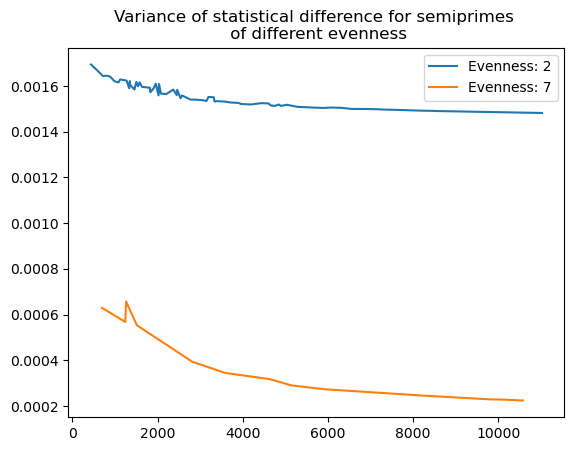

In [455]:
# As n increases, variance decreases; increasing k decreases variance with factor O(1/k).

d_small_vars = dict(zip(small_evenness, small_vars))
d_large_vars = dict(zip(large_evenness, large_vars))

import collections
d_small_vars = dict(collections.OrderedDict(sorted(d_small_vars.items())))
d_large_vars = dict(collections.OrderedDict(sorted(d_large_vars.items())))

plt.plot(d_small_vars.keys(), d_small_vars.values(), label="Evenness: 2")

plt.plot(d_large_vars.keys(), d_large_vars.values(), label="Evenness: 7")

plt.title("Variance of statistical difference for semiprimes \n of different evenness")

# plt.axhline(y=exp_formula(2), color="C0", linestyle=":")
# plt.axhline(y=exp_formula(7), color="C1", linestyle=":")
plt.legend()

In [481]:
n = primes[-3]*primes[-2]

## Conditional independence

In [571]:
#indices = np.random.choice(np.arange(1,s), 100, replace=False)

In [721]:
print("{}".format(n))

1363


In [728]:
for i in range(2,50):
    n = ords.index[i]
    print("Chosen semiprime: {}".format(n))
    print("Evenness: {}\n".format(prime_factors(sp.totient(n)).count(2)))
    np.unique(np.vectorize(parity_2)(orders_single_number(n)), return_counts=True)

    orders_single_number_list_processed = np.vectorize(parity_2)(orders_single_number(n))

    pairs = np.array([(i,int(j)) for i,j in zip(orders_fermat_list[1:n-1], orders_single_number_list_processed[1:n-1])], dtype='i,i')

    pair_stats = np.unique(pairs, return_counts=True)

    pair_stats = {tuple(k):v for k,v in zip(list(pair_stats[0]),list(pair_stats[1]))}

    for i in [0,1]:
        for j in [-1,0,1]:
            if (i,j) not in list(pair_stats.keys()):
                pair_stats[(i,j)] = 0

    pair_stats_whole = np.unique(orders_single_number_list_processed, return_counts=True)

    pair_stats_whole = {k:v for k,v in zip(list(pair_stats_whole[0]),list(pair_stats_whole[1]))}

    print("P(-1 | 1)")
    p_o_e = pair_stats[(1,-1)]/(pair_stats[(1,-1)]+pair_stats[(1, 0)] + pair_stats[(1, 1)])
    print(p_o_e)

    print("P(0 | 1)")
    p_n_e = pair_stats[(1,0)]/(pair_stats[(1,-1)]+pair_stats[(1, 0)] + pair_stats[(1, 1)])
    print(p_n_e)

    print("P(1 | 1)")
    p_e_e = pair_stats[(1,1)]/(pair_stats[(1,-1)]+pair_stats[(1, 0)] + pair_stats[(1, 1)])
    print(p_e_e,'\n')

    print("P(-1 | 0)")
    p_o_n = pair_stats[(0,-1)]/(pair_stats[(0,1)]+pair_stats[(0,-1)] + pair_stats[(0,0)])
    print(p_o_n)

    print("P(0 | 0)")
    p_n_n = pair_stats[(0,0)]/(pair_stats[(0,1)]+pair_stats[(0,-1)] + pair_stats[(0,0)])
    print(p_n_n)

    print("P(1 | 0)")
    p_e_n = pair_stats[(0,1)]/(pair_stats[(0,1)]+pair_stats[(0,-1)] + pair_stats[(0,0)])
    print(p_e_n,'\n')
    
    print("P(-1)")
    p_o = pair_stats_whole[-1]/(sum(list(pair_stats_whole.values())))
    print(p_o)

    print("P(0)")
    p_n = pair_stats_whole[0]/(sum(list(pair_stats_whole.values())))
    print(p_n)

    print("P(1)")
    p_e = pair_stats_whole[1]/(sum(list(pair_stats_whole.values())))
    print(p_e,'\n')

    p_ne_e = p_o_e + p_n_e

    p_e_ne = p_e_n

    p_ne = p_o + p_n
    
    print("|P(not_even) - P(not_even | even)|") 
    print(np.abs(p_ne - p_ne_e))
    
    print("|P(even) - P(even | not_even)|")
    print(np.abs(p_e - p_e_ne))
    print("\n")

Chosen semiprime: 323
Evenness: 5

P(-1 | 1)
0.025
P(0 | 1)
0.10625
P(1 | 1)
0.86875 

P(-1 | 0)
0.0
P(0 | 0)
0.0
P(1 | 0)
1.0 

P(-1)
0.02786377708978328
P(0)
0.10835913312693499
P(1)
0.8637770897832817 

|P(not_even) - P(not_even | even)|
0.0049729102167182515
|P(even) - P(even | not_even)|
0.13622291021671828


Chosen semiprime: 299
Evenness: 3

P(-1 | 1)
0.10810810810810811
P(0 | 1)
0.11486486486486487
P(1 | 1)
0.777027027027027 

P(-1 | 0)
0.0
P(0 | 0)
0.0
P(1 | 0)
1.0 

P(-1)
0.11036789297658862
P(0)
0.11705685618729098
P(1)
0.7725752508361204 

|P(not_even) - P(not_even | even)|
0.004451776190906642
|P(even) - P(even | not_even)|
0.22742474916387956


Chosen semiprime: 391
Evenness: 5

P(-1 | 1)
0.028350515463917526
P(0 | 1)
0.0979381443298969
P(1 | 1)
0.8737113402061856 

P(-1 | 0)
0.0
P(0 | 0)
0.0
P(1 | 0)
1.0 

P(-1)
0.030690537084398978
P(0)
0.09974424552429667
P(1)
0.8695652173913043 

|P(not_even) - P(not_even | even)|
0.00414612281488122
|P(even) - P(even | not_even)|
0.1

In [736]:
n = ords.index[-1]

In [ ]:
print("Chosen semiprime: {}".format(n))
print("Evenness: {}\n".format(prime_factors(sp.totient(n)).count(2)))
np.unique(np.vectorize(parity_2)(orders_single_number(n)), return_counts=True)

orders_single_number_list_processed = np.vectorize(parity_2)(orders_single_number(n))

pairs = np.array([(i,int(j)) for i,j in zip(orders_fermat_list[1:n-1], orders_single_number_list_processed[1:n-1])], dtype='i,i')

pair_stats = np.unique(pairs, return_counts=True)

pair_stats = {tuple(k):v for k,v in zip(list(pair_stats[0]),list(pair_stats[1]))}

for i in [0,1]:
    for j in [-1,0,1]:
        if (i,j) not in list(pair_stats.keys()):
            pair_stats[(i,j)] = 0

pair_stats_whole = np.unique(orders_single_number_list_processed, return_counts=True)

pair_stats_whole = {k:v for k,v in zip(list(pair_stats_whole[0]),list(pair_stats_whole[1]))}

print("P(-1 | 1)")
p_o_e = pair_stats[(1,-1)]/(pair_stats[(1,-1)]+pair_stats[(1, 0)] + pair_stats[(1, 1)])
print(p_o_e)

print("P(0 | 1)")
p_n_e = pair_stats[(1,0)]/(pair_stats[(1,-1)]+pair_stats[(1, 0)] + pair_stats[(1, 1)])
print(p_n_e)

print("P(1 | 1)")
p_e_e = pair_stats[(1,1)]/(pair_stats[(1,-1)]+pair_stats[(1, 0)] + pair_stats[(1, 1)])
print(p_e_e,'\n')

print("P(-1 | 0)")
p_o_n = pair_stats[(0,-1)]/(pair_stats[(0,1)]+pair_stats[(0,-1)] + pair_stats[(0,0)])
print(p_o_n)

print("P(0 | 0)")
p_n_n = pair_stats[(0,0)]/(pair_stats[(0,1)]+pair_stats[(0,-1)] + pair_stats[(0,0)])
print(p_n_n)

print("P(1 | 0)")
p_e_n = pair_stats[(0,1)]/(pair_stats[(0,1)]+pair_stats[(0,-1)] + pair_stats[(0,0)])
print(p_e_n,'\n')

print("P(-1)")
p_o = pair_stats_whole[-1]/(sum(list(pair_stats_whole.values())))
print(p_o)

print("P(0)")
p_n = pair_stats_whole[0]/(sum(list(pair_stats_whole.values())))
print(p_n)

print("P(1)")
p_e = pair_stats_whole[1]/(sum(list(pair_stats_whole.values())))
print(p_e,'\n')

p_ne_e = p_o_e + p_n_e

p_e_ne = p_e_n

p_ne = p_o + p_n

print("|P(not_even) - P(not_even | even)|") 
print(np.abs(p_ne - p_ne_e))

print("|P(even) - P(even | not_even)|")
print(np.abs(p_e - p_e_ne))
print("\n")

In [738]:
prime_factors(sp.totient(n))

[2, 2, 2, 2, 2, 2, 3, 3, 3, 7]

In [743]:
np.unique(orders_single_number_list_processed

array([-1,  1,  1, ...,  1,  1,  0])

In [745]:
import pandas as pd

In [746]:
pd.Series(orders_single_number_list_processed).to_csv("orders_12317.csv")

In [747]:
'''
Chosen semiprime: 12317
Evenness: 6

P(-1 | 1)
0.015161395500489077
P(0 | 1)
0.01793283338767525
P(1 | 1)
0.9669057711118356 

P(-1 | 0)
0.0425531914893617
P(0 | 0)
0.0
P(1 | 0)
0.9574468085106383 

P(-1)
0.01534464561175611
P(0)
0.017942680847608996
P(1)
0.966712673540635 

|P(not_even) - P(not_even | even)|
0.00019309757120077736
|P(even) - P(even | not_even)|
0.0092658650299966
'''

'\nChosen semiprime: 12317\nEvenness: 6\n\nP(-1 | 1)\n0.015161395500489077\nP(0 | 1)\n0.01793283338767525\nP(1 | 1)\n0.9669057711118356 \n\nP(-1 | 0)\n0.0425531914893617\nP(0 | 0)\n0.0\nP(1 | 0)\n0.9574468085106383 \n\nP(-1)\n0.01534464561175611\nP(0)\n0.017942680847608996\nP(1)\n0.966712673540635 \n\n|P(not_even) - P(not_even | even)|\n0.00019309757120077736\n|P(even) - P(even | not_even)|\n0.0092658650299966\n'

In [749]:
labels, counts = np.unique(orders_single_number_list_processed, return_counts=True)
counts = counts/sum(counts)
dict(zip(labels, counts))

{-1: 0.01534464561175611, 0: 0.017942680847608996, 1: 0.966712673540635}

In [750]:
order_stats_formula(n)

{-1: 0.01534464561175611, 0: 0.017942680847608996, 1: 0.966712673540635}

In [753]:
primes[10]*F3

7967

In [762]:
F3*F4

16843009

In [764]:
# Modulus method
# Argument why for N_Fermat << N conditional would still hold 

## Verifying some theorems about order distribution

In [11]:
from itertools import chain, combinations

def get_all_subsets(lst):
    """
    Returns all unique subsets of the input list.
    """
    # Convert list to set to remove duplicates
    lst_set = lst#set(lst)
    
    # Get all combinations of elements in the set
    subsets = chain.from_iterable(combinations(lst_set, r) for r in range(len(lst_set)+1))
    
    # Convert subsets from tuples to lists
    subsets = [tuple(s) for s in subsets]
    
    subsets = set(subsets)
    return list(subsets)

In [12]:
def get_divisors(n):
    subsets = get_all_subsets(prime_factors(n))
    
    return list(np.sort([int(np.prod(i)) for i in subsets]))

In [191]:
N = large_evenness[-1]

In [192]:
p,q = prime_factors(N)

In [193]:
ords_histogram = {}
for i in get_divisors(sp.totient(p)):
    for j in get_divisors(sp.totient(q)):
        l = np.lcm(i,j)
        try:
            ords_histogram[l] += sp.totient(i)*sp.totient(j)
        except: 
            ords_histogram[l] = sp.totient(i)*sp.totient(j)
        
        
    

In [194]:
ords_histogram

{1: 1,
 2: 3,
 4: 12,
 7: 6,
 8: 48,
 14: 18,
 16: 64,
 28: 72,
 56: 288,
 112: 384,
 11: 10,
 22: 30,
 44: 120,
 77: 60,
 88: 480,
 154: 180,
 176: 640,
 308: 720,
 616: 2880,
 1232: 3840}

In [195]:
3840/N

0.38182360544894106

In [180]:
np.lcm((p-1), (q-1))

126

In [178]:
np.sum(list(ords_histogram.values()))

756

In [96]:
1801*1871

3369671

In [97]:
sp.totient(1801*1871)

3366000

In [ ]:
# n - f = p*q - (p-1)*(q-1) = p*q - p*q + p + q - 1 = p + q - 1 = O(sqrt(N)). So can't just iterate all possible totients. 
# This is just the brute force O(sqrt(N)) method of factorising N. No
n = N
for i in range(2,int(np.sqrt(N))+1):
    for j in range(2,int(np.sqrt(N))+1):
        f = (i-1)*(j-1)     
        ps = (1/2 *(np.sqrt((-f + n + 1)**2 - 4*n) - f + n + 1), 1/2 *(-np.sqrt((-f + n + 1)**2 - 4*n) - f + n + 1))
        ps = [p for p in ps if p.is_integer()]
        qs = [N/p for p in ps]
        
        if(len(qs)!= 0):
            print(p[0], q[0])

In [199]:
F2*F3

4369

## Efficient order computation

In [103]:
from sympy.ntheory import n_order

def order_fastest(x,N, divisors=None):
    assert(N+1>x)
    if(math.gcd(x,N)!=1):
        return -1
    
    if(not divisors):
        divisors = get_divisors(sp.totient(N))
    
    for d in divisors:
        a = x
        for j in range(1,d):
            a = x*a % N
        if(a==1):
            return d


In [104]:
N = 12317
divisors = {}

In [105]:
divisors[N] = get_divisors(sp.totient(N))

In [106]:
a = coprimes(N)[5]

In [107]:
import time

t1 = time.time()
order_fastest(a, N, divisors[N])
t2 = time.time()

print("Fastest: {}".format(t2 - t1))


t1 = time.time()
order_fast(a, N)
t2 = time.time()

print("Fast: {}".format(t2 - t1))


t1 = time.time()
order_slow(a, N)
t2 = time.time()

print("Slow: {}".format(t2 - t1))

t1 = time.time()
n_order(a, N)
t2 = time.time()

print("Sympy: {}".format(t2 - t1))


Fastest: 0.0019979476928710938
Fast: 0.025960206985473633
Slow: 0.49033093452453613
Sympy: 0.0009646415710449219


In [109]:
F4

65537

In [558]:
def my_n_order(a,N):
    try:
        return n_order(a,N)
    except:
        return -1

In [634]:
primes = primes + [i for i in range(10**5 + 1,10**6) if is_prime(i)]


In [560]:
def evenness(x):
    return prime_factors(sp.totient(x)).count(2)

In [627]:
# Finding first semiprime above cutoff with some desired evenness

def generate_semiprime(cutoff, a):
    threshold = np.sqrt(cutoff)
    for t,p in enumerate(primes):
        if p > threshold:
            break
    
    x = 1
    i = 1
    while(evenness(x)!=a):
        i+= 1
        for j in range(1,i):
            x = primes[:t][-i]*primes[:t][-j]

    return (x, (primes[-i], primes[-j]))

In [210]:
n, (p1, p2) = generate_semiprime(1.03*s, 7)

In [211]:
n

17065157

In [212]:
s

16843009

In [214]:
orders_single_number_list = orders_single_number(n, method=my_n_order)

  0%|          | 0/17065157 [00:00<?, ?it/s]

In [71]:
F3*F4

16843009

In [215]:
pd.Series(orders_single_number_list).to_csv("orders_{}.csv".format(n))

In [216]:
orders_series = pd.Series(orders_single_number_list)

In [217]:
orders_series

0                 1
1            710704
2            533028
3            355352
4           1066056
             ...   
17065152     355352
17065153     533028
17065154     710704
17065155          2
17065156         -1
Length: 17065157, dtype: int32

In [94]:
orders_single_number_list = pd.read_csv("orders_17065157.csv")

In [95]:
orders_single_number_list = orders_single_number_list.set_index("Unnamed: 0")

In [96]:
orders_single_number_list

,0
Unnamed: 0,
0,1
1,710704
2,533028
3,355352
4,1066056
...,...
17065152,355352
17065153,533028
17065154,710704


In [97]:
orders_single_number_list_processed = np.vectorize(parity_2)(orders_single_number_list)

In [102]:
orders_single_number_list_processed = orders_single_number_list_processed.reshape(len(orders_single_number_list_processed), )

In [103]:
pairs = np.array([(i,int(j)) for i,j in zip(orders_fermat_list[1:s-1], orders_single_number_list_processed[1:s-1])], dtype='i,i')

In [108]:
pair_stats = np.unique(pairs, return_counts=True)

pair_stats = {tuple(k):v for k,v in zip(list(pair_stats[0]),list(pair_stats[1]))}

for i in [0,1]:
    for j in [-1,0,1]:
        if (i,j) not in list(pair_stats.keys()):
            pair_stats[(i,j)] = 0

In [105]:
pairs

array([(1, 1), (1, 1), (1, 1), ..., (1, 1), (1, 1), (1, 1)],
      dtype=[('f0', '<i4'), ('f1', '<i4')])

In [230]:
print("Chosen semiprime: {}".format(n))
print("Evenness: {}\n".format(7))

pairs = np.array([(i,int(j)) for i,j in zip(orders_fermat_list[1:s-1], orders_single_number_list_processed[1:s-1])], dtype='i,i')

pair_stats = np.unique(pairs, return_counts=True)

pair_stats = {tuple(k):v for k,v in zip(list(pair_stats[0]),list(pair_stats[1]))}

for i in [0,1]:
    for j in [-1,0,1]:
        if (i,j) not in list(pair_stats.keys()):
            pair_stats[(i,j)] = 0

pair_stats_whole = np.unique(orders_single_number_list_processed, return_counts=True)

pair_stats_whole = {k:v for k,v in zip(list(pair_stats_whole[0]),list(pair_stats_whole[1]))}

print("P(-1 | 1)")
p_o_e = pair_stats[(1,-1)]/(pair_stats[(1,-1)]+pair_stats[(1, 0)] + pair_stats[(1, 1)])
print(p_o_e)

print("P(0 | 1)")
p_n_e = pair_stats[(1,0)]/(pair_stats[(1,-1)]+pair_stats[(1, 0)] + pair_stats[(1, 1)])
print(p_n_e)

print("P(1 | 1)")
p_e_e = pair_stats[(1,1)]/(pair_stats[(1,-1)]+pair_stats[(1, 0)] + pair_stats[(1, 1)])
print(p_e_e,'\n')

print("P(-1 | 0)")
p_o_n = pair_stats[(0,-1)]/(pair_stats[(0,1)]+pair_stats[(0,-1)] + pair_stats[(0,0)])
print(p_o_n)

print("P(0 | 0)")
p_n_n = pair_stats[(0,0)]/(pair_stats[(0,1)]+pair_stats[(0,-1)] + pair_stats[(0,0)])
print(p_n_n)

print("P(1 | 0)")
p_e_n = pair_stats[(0,1)]/(pair_stats[(0,1)]+pair_stats[(0,-1)] + pair_stats[(0,0)])
print(p_e_n,'\n')

print("P(-1)")
p_o = pair_stats_whole[-1]/(sum(list(pair_stats_whole.values())))
print(p_o)

print("P(0)")
p_n = pair_stats_whole[0]/(sum(list(pair_stats_whole.values())))
print(p_n)

print("P(1)")
p_e = pair_stats_whole[1]/(sum(list(pair_stats_whole.values())))
print(p_e,'\n')

p_ne_e = p_o_e + p_n_e

p_e_ne = p_e_n

p_ne = p_o + p_n

print("|P(not_even) - P(not_even | even)|") 
print(np.abs(p_ne - p_ne_e))

print("|P(even) - P(even | not_even)|")
print(np.abs(p_e - p_e_ne))
print("\n")

Chosen semiprime: 17065157
Evenness: 7

P(-1 | 1)
0.007811189163398097
P(0 | 1)
0.0004842281630175211
P(1 | 1)
0.9917045826735844 

P(-1 | 0)
0.007204523346303502
P(0 | 0)
0.00045598249027237355
P(1 | 0)
0.9923394941634242 

P(-1)
0.007808718079769204
P(0)
0.0004840857895418132
P(1)
0.991707196130689 

|P(not_even) - P(not_even | even)|
2.6134571046009664e-06
|P(even) - P(even | not_even)|
0.0006322980327351235




In [232]:
a = 7
a2 = evenness(s)

In [302]:
k = s

In [303]:
idxs = np.random.choice(s, (k), replace=False)

In [304]:
print(np.sum(np.abs(orders_single_number_list_processed[idxs] != orders_fermat_list[idxs]))/len(idxs))

0.012167481475548698


In [301]:
 print(coprime_density(n) + coprime_density(s) - coprime_density(n)*coprime_density(s)*(2 - 1/(2**a) - 1/(2**a2) + 1/(2**(a+a2-1))))

0.012164827330033212


In [368]:
E_RGB.subs(values).evalf()

0.0121648109150719

In [369]:
# Testing sdev calcs

In [348]:
n = 17065157 #11021 #small_evenness[-1]
s = N_fermat
m = max([n,s])
counts = {(k,i): int(m*v) for i in [n,s] for k,v in order_stats_formula(i).items()}

In [349]:
marbles = dict(zip([G1, R1, B1, G2, R2, B2], list(counts.values())))

In [400]:
values = {**marbles, **{N: m, N_bar : m - 1, k: 1000}}

In [401]:
math.sqrt(V_RGB.subs(values).evalf())

0.0030034398557209417

In [539]:

for K in [int(i) for i in [1e2, 1e3, 1e4, 1e5]]:
    stat_diffs = []
    for i in tqdm(range(10000)):
        idxs = np.random.choice(s, (K), replace=True)
        stat_diffs.append(np.sum(np.abs(orders_single_number_list_processed[idxs] != orders_fermat_list[idxs]))/len(idxs))

    values = {**marbles, **{N: m, N_bar : m - 1, k: K}}
    print("Std for {} samples \n- Brute: {}\n- Formula: {}".format(K, np.std(stat_diffs), math.sqrt(V_RGB.subs(values).evalf())))

  0%|          | 0/10000 [00:00<?, ?it/s]

Std for 100 samples 
- Brute: 0.010978365588738609
- Formula: 0.010962091107953055


  0%|          | 0/10000 [00:00<?, ?it/s]

Std for 1000 samples 
- Brute: 0.0034751089062071134
- Formula: 0.003466426455977394


  0%|          | 0/10000 [00:00<?, ?it/s]

Std for 10000 samples 
- Brute: 0.0010769192158653312
- Formula: 0.0010958920869609617


  0%|          | 0/10000 [00:00<?, ?it/s]

Std for 100000 samples 
- Brute: 0.0003486874472934178
- Formula: 0.0003456387932799466


In [ ]:
# Can I just get away with the fact that the formula nad brute STD have the same order?
# Why is it that the brute and formula E[X] are so close, but not the variances?
# Variance: P(even ith | odd in the jth) .... and so on. 
P(even ith [first box]| even ith row [second box]) ----- INDEPENDENT 
P(even ith [first box]| even jth row [first box]) ----- IT MIGHT NOT


## Pairs

In [110]:
pairs = np.array([(i,int(j)) for i,j in zip(orders_fermat_list[1:s-1], orders_single_number_list_processed[1:s-1])], dtype='i,i')

pair_stats = np.unique(pairs, return_counts=True)

pair_stats = {tuple(k):v for k,v in zip(list(pair_stats[0]),list(pair_stats[1]))}

KeyboardInterrupt: 

In [135]:
for i in [-1,0,1]:
    for j in [-1,0,1]:
        if (i,j) not in list(pair_stats.keys()):
            pair_stats[(i,j)] = 0

In [124]:
total_pairs = sum(pair_stats.values())

In [136]:
pair_stats

{(0, -1): 474,
 (0, 0): 30,
 (0, 1): 65288,
 (1, -1): 131050,
 (1, 0): 8124,
 (1, 1): 16638041,
 (-1, -1): 0,
 (-1, 0): 0,
 (-1, 1): 0}

In [115]:
def indicate(label, pair_stats):
    
    count_true = 0
    count_false = 0
    for k,v in pair_stats.items():
        if ((k[0] != k[1]) and (label in k)):
            count_true += v
        else:
            count_false += v
    
    return {"mismatch_wrt_{}".format(str(label)): count_true, "matching_wrt_{}".format(str(label)): count_false}

In [229]:
def indicate_double(label1, label2, pair_stats):
    
    keys = list(pair_stats.keys())
    keys_label1 = set([k for k in keys  if ((k[0] != k[1]) and (label1 in k))])
    keys_label2 = set([k for k in keys  if ((k[0] != k[1]) and (label2 in k))])
    keys_intersection = keys_label1 and keys_label2
    
    prob_double = 0 
    prob_single = 0
    
    for k in list(keys_intersection):
        prob_single += pair_stats[k]

    
    for k1 in list(keys_label1):
        if k1 not in keys_intersection:
            for k2 in list(keys_label2): 
                prob_double+= pair_stats[k1]*pair_stats[k2]
        else:
            for k2 in list(keys_label2 - {k1}):
                prob_double += pair_stats[k1]*pair_stats[k2]
            prob_double += pair_stats[k1]*(pair_stats[k1]-1)
    
    return (prob_double/((total_pairs)*(total_pairs-1)), prob_single/total_pairs)


In [157]:
K = 100

### Expenses

In [171]:
weeks_remaining = 21

salary = 1250

rent = 800

rent_alt = 550

flights = 200

groceries = 100

other = 140

other_alt = 160 

savings_current = 11552 + 200

quad = 50000

ucla_fee = 55916 + 350

ucla_accom = 1464

ucla_food = 3732



In [172]:
apr = 2*(salary - other)
may = 4*(salary - other) - (flights + rent + groceries) - abs(other-other_alt)
jun = 4*(salary - other) - (flights/2 + rent + groceries) - abs(other-other_alt)
jul = 4*(salary - other) - (flights + rent + groceries) - abs(other-other_alt)
aug = 4*(salary - other) - (flights + rent + groceries) - abs(other-other_alt)
sept = 3*(salary - other)

apr_alt = 2*(salary - other_alt - groceries - rent_alt) 
may_alt = 4*(salary - other_alt - groceries - rent_alt)
jun_alt = 4*(salary - other_alt - groceries - rent_alt)
jul_alt = 4*(salary - other_alt - groceries - rent_alt)
aug_alt = 4*(salary - other_alt - groceries - rent_alt)
sept_alt = 2*(salary - other_alt - groceries - rent_alt) + (salary - other)



In [173]:
may_to_sept = apr + may + jun + jul + aug + sept
may_to_sept_alt = apr_alt + may_alt + jun_alt + jul_alt + aug_alt + sept_alt

In [174]:
savings_final = savings_current + may_to_sept

In [175]:
savings_final_alt = savings_current + may_to_sept_alt

In [176]:
savings_USD = 0.67*(savings_final)

In [177]:
savings_USD_alt = 0.67*(savings_final_alt)

In [178]:
savings_USD

20556.940000000002

In [179]:
savings_USD_alt

14513.54

In [180]:
savings_USD - savings_USD_alt

6043.4000000000015

In [144]:
income_USD = ((4*(21 * 7))*12)

In [145]:
((income_USD + savings_USD + quad) - ucla_fee - 12*ucla_accom - ucla_food)

117.29000000000815

### Double Expectancies

In [244]:
p_11_double = {}
p_1_double = {}

for l1,l2 in zip([0,1,1],[-1,0,-1]):
    label = (l1,l2)

    p_11_double[label], p_1_double[label] = indicate_double(*label, pair_stats)


In [245]:
E_RG_numerical = (K*(K-1)/2)*p_11_double[(0,-1)] + K*p_1_double[(0,-1)] 

In [246]:
E_BR_numerical = (K*(K-1)/2)*p_11_double[(1,0)] + K*p_1_double[(1,0)] 

In [247]:
E_BG_numerical = (K*(K-1)/2)*p_11_double[(1,-1)] + K*p_1_double[(1,-1)] 

In [252]:
print(E_BG_numerical/E_BG_simplify.subs(values).evalf())
print(E_BR_numerical/E_BR_simplify.subs(values).evalf())
print(E_RG_numerical/E_RG_simplify.subs(values).evalf())

0.728547205813336
0.729594430429145
2.77780132855809


### Single Expectancies

In [233]:
mismatch_counts = {}
mismatches = {}
p_11_wrt = {}
p_1_wrt = {}

for label in [-1,0,1]:
    mismatch_counts[label] = indicate(label, pair_stats)

    mismatches[label] = mismatch_counts[label]["mismatch_wrt_{}".format(str(label))]

    p_11_wrt[label] = (mismatches[label]*(mismatches[label]-1))/(total_pairs*(total_pairs-1))
    
    p_1_wrt[label] = (mismatches[label])/(total_pairs)



In [253]:
E_RR_numerical = (K*(K-1)/2)*p_11_wrt[0] + K*p_1_wrt[0]

E_R_numerical = K*p_1_wrt[0]

print(E_R_numerical/E_R.subs(values).evalf())

print(E_RR_numerical/E_RR_simplify.subs(values).evalf())

1.00005415732828
0.848666294083109


In [255]:
E_GG_numerical = (K*(K-1)/2)*p_11_wrt[-1] + K*p_1_wrt[-1]

E_G_numerical = K*p_1_wrt[-1]

print(E_G_numerical/E_G.subs(values).evalf())

print(E_GG_numerical/E_GG_simplify.subs(values).evalf())

1.00000558953054
0.782003437036084


In [256]:
E_BB_numerical = (K*(K-1)/2)*p_11_wrt[1] + K*p_1_wrt[1]

E_B_numerical = K*p_1_wrt[1]

print(E_B_numerical/E_B.subs(values).evalf())

print(E_BB_numerical/E_BB_simplify.subs(values).evalf())

1.00040744359118
0.727546615626610


In [179]:
E_RGB.subs(values).evalf()

0.0121648109150719

In [201]:
(E_B_numerical + E_G_numerical + E_R_numerical)/(2*K)

0.012167423548538572

In [259]:
V_R_numerical =  E_RR_numerical - (E_R_numerical)**2

In [289]:
E_G_numerical

0.7808819410928227

In [290]:
E_G.subs(values).evalf()

0.780877576353759

In [260]:
V_G_numerical =  E_GG_numerical - (E_G_numerical)**2

In [261]:
V_B_numerical =  E_BB_numerical - (E_B_numerical)**2

In [269]:
V_BR_numerical = E_BR_numerical - E_B_numerical*E_R_numerical

In [270]:
V_BG_numerical = E_BG_numerical - E_B_numerical*E_G_numerical

In [271]:
V_RG_numerical = E_RG_numerical - E_R_numerical*E_G_numerical

In [272]:
V_RGB_numerical = V_G_numerical + V_B_numerical + V_R_numerical + V_BG_numerical + V_BR_numerical + V_RG_numerical

In [279]:
V_RGB_numerical = V_RGB_numerical/(4*K**2)

In [281]:
np.sqrt(V_RGB_numerical)

0.00038438246526800615

In [503]:
math.sqrt(float(V_RGB.subs(values).evalf()))

0.009497960228209337

In [504]:
np.std(stat_diffs)

0.010901376059929316

In [505]:
stat_diffs_squared = []
for i in tqdm(range(1000)):
    idxs = np.random.choice(s, (K), replace=True)
    stat_diffs_squared.append((np.sum(np.abs(orders_single_number_list_processed[idxs] != orders_fermat_list[idxs]))/len(idxs))**2)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [511]:
np.mean(stat_diffs_squared)

0.0002818000000000001

# Bounds on Variance

In [542]:
N_bar

\overline{N}

In [557]:
V_RGB.expand().subs({N_bar: N-1, k:N}).subs(values).evalf()

2.20449734938852e-12

In [553]:
values

{G_1: 133257,
 R_1: 8261,
 B_1: 16923639,
 G_2: 1,
 R_2: 66660,
 B_2: 16998495,
 N: 17065157,
 \overline{N}: 17065156,
 k: 100000}

In [611]:
np.logspace(2,7,6)

array([1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07])

In [635]:

xs = np.logspace(9, 11, 6)


ys = []
for i in tqdm(xs):
    n, _ = generate_semiprime(int(i), 5)#11021 #small_evenness[-1]
    print(n)
    s = N_fermat
    m = max([n,s])
    counts = {(k,i): int(m*v) for i in [n,s] for k,v in order_stats_formula(i).items()}
    
    marbles = dict(zip([G1, R1, B1, G2, R2, B2], list(counts.values())))
    
    values = {**marbles, **{N: m, N_bar : m - 1, k: m}}
    ys.append(V_RGB.expand().subs(values).evalf())
    


  0%|          | 0/6 [00:00<?, ?it/s]

998812807
2504001551
6295311613
15708611531
39769532893
99986866813


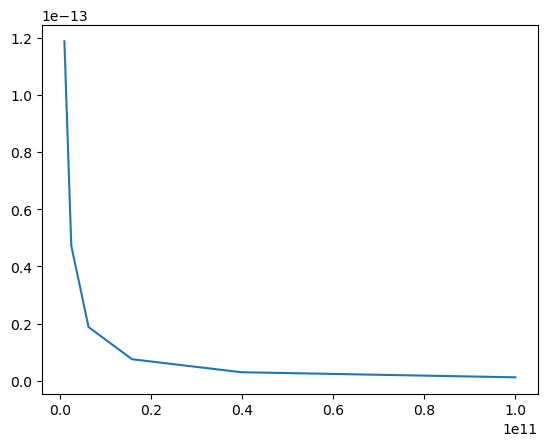

In [636]:
plt.plot(xs,ys)

In [637]:
ys[-1]

1.17910962769769e-15

In [638]:
ys[0]

1.18888833222333e-13

In [643]:
V_RGB.expand().subs({k: m}).subs(values).evalf()

1.17910962769769e-15

In [644]:
V_RGB.expand().subs({k: m}).subs(values).evalf()

1.17910962769769e-15

In [656]:
V_RGB.expand().subs({R1:0, R2:0,k:N, N_bar:N})

-B_1**2*B_2**2/N**5 + 3*B_1**2*B_2/(4*N**4) + B_1**2*B_2/(4*N**5) - B_1**2/(4*N**3) + 3*B_1*B_2**2/(4*N**4) + B_1*B_2**2/(4*N**5) - 2*B_1*B_2*G_1*G_2/N**5 + B_1*B_2*G_1/N**4 + B_1*B_2*G_2/N**4 - B_1*B_2/N**4 + B_1*G_1*G_2/N**4 - B_1*G_1/(2*N**3) - B_1*G_2/(2*N**3) + B_1*G_2/(2*N**4) + B_1/(4*N**3) - B_2**2/(4*N**3) + B_2*G_1*G_2/N**4 - B_2*G_1/(2*N**3) + B_2*G_1/(2*N**4) - B_2*G_2/(2*N**3) + B_2/(4*N**3) - G_1**2*G_2**2/N**5 + 3*G_1**2*G_2/(4*N**4) + G_1**2*G_2/(4*N**5) - G_1**2/(4*N**3) + 3*G_1*G_2**2/(4*N**4) + G_1*G_2**2/(4*N**5) - G_1*G_2/N**4 + G_1/(4*N**3) - G_2**2/(4*N**3) + G_2/(4*N**3)

In [705]:
V_RGB.expand().subs({N_bar:N, S_bar: S, k:np.inf}).evalf()

-0.25*B_1**2*B_2/(N**2*S**2) - 0.25*B_1*B_2**2/(N**2*S**2) - B_1*B_2*G_1/(N*S**2) + B_1*B_2*G_1/(N**2*S) - B_1*B_2*R_1/(N*S**2) + 0.5*B_1*B_2/(N*S**2) + B_1*B_2*R_1/(N**2*S) + 0.5*B_1*B_2/(N**2*S) - B_1*G_1*G_2/(N*S**2) + B_1*G_1*G_2/(N**2*S) + 0.5*B_1*G_1/S**2 - 0.5*B_1*G_1/N**2 + 0.5*B_1*G_2/S**2 - 0.5*B_1*G_2/(N*S) - 0.5*B_1*G_2/(N*S**2) + 0.5*B_1*R_1/S**2 + 0.5*B_1*R_2/S**2 - B_1*R_1*R_2/(N*S**2) - 0.5*B_1*R_2/(N*S) - 0.5*B_1*R_2/(N*S**2) + B_1*R_1*R_2/(N**2*S) - 0.5*B_1*R_1/N**2 - 0.25*B_1/N**2 + 0.5*B_2*G_1/S**2 - 0.5*B_2*G_1/(N*S) - 0.5*B_2*G_1/(N*S**2) + 0.5*B_2*R_1/S**2 - 0.25*B_2/S**2 - 0.5*B_2*R_1/(N*S) - 0.5*B_2*R_1/(N*S**2) - 0.25*G_1**2*G_2/(N**2*S**2) - 0.25*G_1*G_2**2/(N**2*S**2) - G_1*G_2*R_1/(N*S**2) + 0.5*G_1*G_2/(N*S**2) + G_1*G_2*R_1/(N**2*S) + 0.5*G_1*G_2/(N**2*S) + 0.5*G_1*R_1/S**2 + 0.5*G_1*R_2/S**2 - G_1*R_1*R_2/(N*S**2) - 0.5*G_1*R_2/(N*S) - 0.5*G_1*R_2/(N*S**2) + G_1*R_1*R_2/(N**2*S) - 0.5*G_1*R_1/N**2 - 0.25*G_1/N**2 + 0.5*G_2*R_1/S**2 - 0.25*G_2/S**2 - 0.5*

In [1007]:
V_RGB.subs({N_bar:N, S_bar:N, S:N, k:N}).expand()

-B_1**2*B_2**2/N**5 + 3*B_1**2*B_2/(4*N**4) + B_1**2*B_2/(4*N**5) - B_1**2/(4*N**3) + 3*B_1*B_2**2/(4*N**4) + B_1*B_2**2/(4*N**5) - 2*B_1*B_2*G_1*G_2/N**5 + B_1*B_2*G_1/N**4 + B_1*B_2*G_2/N**4 + B_1*B_2*R_1/N**4 + B_1*B_2*R_2/N**4 - B_1*B_2/N**4 - 2*B_1*B_2*R_1*R_2/N**5 + B_1*G_1*G_2/N**4 - B_1*G_1/(2*N**3) - B_1*G_2/(2*N**3) + B_1*G_2/(2*N**4) - B_1*R_1/(2*N**3) - B_1*R_2/(2*N**3) + B_1/(4*N**3) + B_1*R_1*R_2/N**4 + B_1*R_2/(2*N**4) - B_2**2/(4*N**3) + B_2*G_1*G_2/N**4 - B_2*G_1/(2*N**3) + B_2*G_1/(2*N**4) - B_2*G_2/(2*N**3) - B_2*R_1/(2*N**3) - B_2*R_2/(2*N**3) + B_2/(4*N**3) + B_2*R_1*R_2/N**4 + B_2*R_1/(2*N**4) - G_1**2*G_2**2/N**5 + 3*G_1**2*G_2/(4*N**4) + G_1**2*G_2/(4*N**5) - G_1**2/(4*N**3) + 3*G_1*G_2**2/(4*N**4) + G_1*G_2**2/(4*N**5) + G_1*G_2*R_1/N**4 + G_1*G_2*R_2/N**4 - G_1*G_2/N**4 - 2*G_1*G_2*R_1*R_2/N**5 - G_1*R_1/(2*N**3) - G_1*R_2/(2*N**3) + G_1/(4*N**3) + G_1*R_1*R_2/N**4 + G_1*R_2/(2*N**4) - G_2**2/(4*N**3) - G_2*R_1/(2*N**3) - G_2*R_2/(2*N**3) + G_2/(4*N**3) + G_2*

# Reducing corerlations between columns

In [996]:
from sklearn.metrics.cluster import normalized_mutual_info_score
from itertools import permutations


In [997]:
def generate_permutations(n):
    # Create a list of all possible bit sequences of length n
    bit_sequences = [[0], [1]]
    for i in range(n - 1):
        bit_sequences = [seq + [bit] for seq in bit_sequences for bit in [0, 1]]

    # Convert each bit sequence to a string and return the list of permutations
    permutations = ["".join(str(bit) for bit in seq) for seq in bit_sequences]
    return permutations


In [998]:
strings = generate_permutations(10)

In [999]:
i, j = random.randint(0,len(strings)), random.randint(0,len(strings))
string_N = strings[i]
string_S = strings[j]
permutations_list = list(set(list(permutations(string_S))))
random.shuffle(permutations_list)
rs = np.arange(1, len(permutations_list))
ys = []
for r in rs:
    string_N = strings[i]
    string_S = strings[j]

    a = list(string_S)

    i = 0
    for s in permutations_list:
        if s != string_S:
            i += 1
            if(i>=r):
                break
            a.extend(list(s)) 

    string_N += string_N*(r-1)
    
    ys.append(normalized_mutual_info_score(list(string_N), a))
    


In [1000]:
print(strings[i])
print(strings[j])

0000101100
0001000001


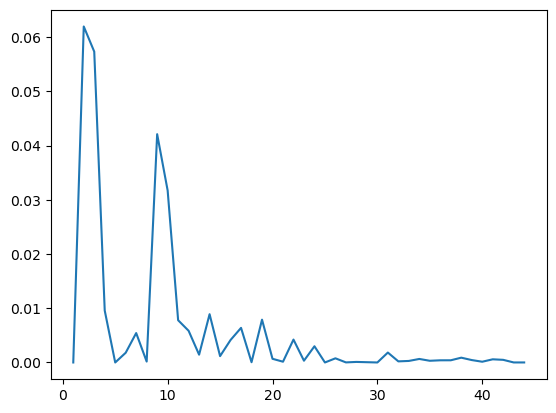

In [1001]:
plt.plot(rs, ys)

In [1008]:
N

N

In [1009]:
n

17065157

In [1010]:
prime_factors(n)

[4129, 4133]

In [1013]:
sp.totient((1-4129)*(1-4133))

5548032